# Vector FPZ lens

In [1]:
from diffractio import np, sp, plt
from diffractio import nm, um, mm, degrees

from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_fields_XY import Vector_field_XY
from diffractio.vector_masks_XY import Vector_mask_XY

from py_pol.jones_vector import Jones_vector
from py_pol.jones_matrix import Jones_matrix

from matplotlib import cm

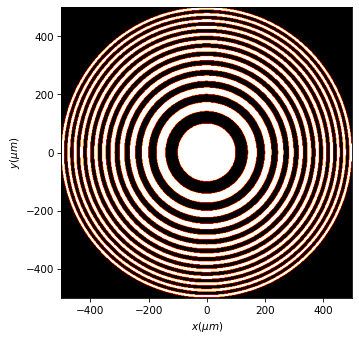

In [2]:
num_data =  1024
length = 1*mm
x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)
wavelength = 5* um

focal=2*mm

t1 = Scalar_mask_XY(x0, y0, wavelength)
t1.fresnel_lens(r0=(0 * um, 0 * um),
                radius=length/2,
                focal=focal,
                kind='amplitude')
t1.draw(kind='intensity')

In [3]:
p0 = Jones_matrix()
p0.diattenuator_perfect(azimuth=0)

p1 = Jones_matrix()
p1.diattenuator_perfect(azimuth=90*degrees)


t_vector = Vector_mask_XY(x0,y0,wavelength)
t_vector.complementary_masks(mask=t1, pol_state_0=p0, pol_state_1=p1)

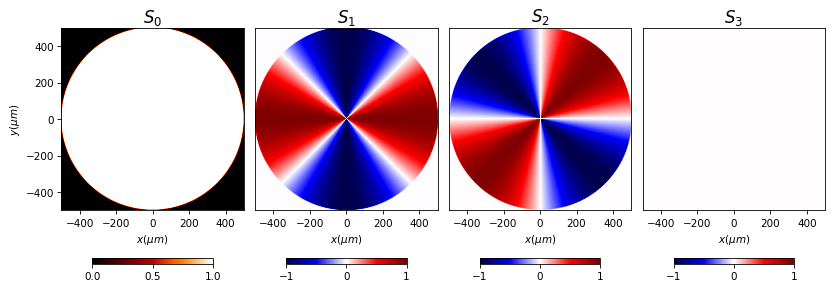

In [4]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.plane_wave(A=1)


E0 = Vector_source_XY(x0, y0, wavelength)
E0.radial_wave(u=u0, r0=(0, 0))
#E0.constant_polarization(u=u0, v=(1, 1))
E0.pupil()
E0.draw('stokes')

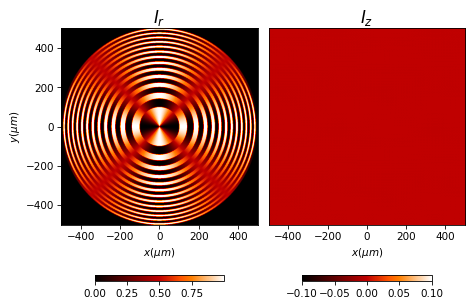

In [5]:
E1 = E0 * t_vector
E1.draw('intensities_rz', logarithm=False)

In [7]:
r_max = 30*um
xout = np.linspace(-r_max, r_max, 64)
yout = np.linspace(-r_max, r_max, 64)

E2 = E1.VCZT(z=focal, xout=xout, yout=yout)

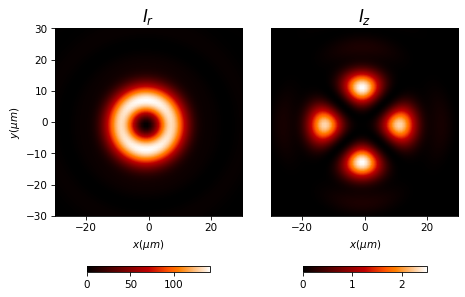

In [8]:
E2.draw('intensities_rz', logarithm=False)


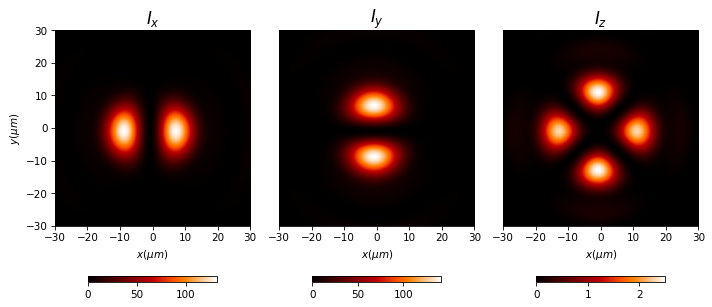

In [9]:
E2.draw('intensities', logarithm=False)